<a href="https://colab.research.google.com/github/durgeshgitup/MA22C013_2023_PL/blob/main/Assignments/Assignment_7/Predator_prey_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Task 1: Solving and Plotting the Solution

In [19]:
# Define the ODE system
def ode_system(y, t, alpha, beta, delta, gamma):
    r, x = y
    drdt = alpha * r - beta * r * x
    dxdt = delta * r * x - gamma * x
    return [drdt, dxdt]

In [20]:
#given  Parameters
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1

In [21]:
# Given Initial conditions
r0 = 5
x0 = 2

In [22]:
# Time points
t = np.linspace(0, 70, 1000)

In [23]:
# Solving the ODE
sol = odeint(ode_system, [r0, x0], t, args=(alpha, beta, delta, gamma))

In [24]:
# Extract solutions
r = sol[:, 0]
x = sol[:, 1]

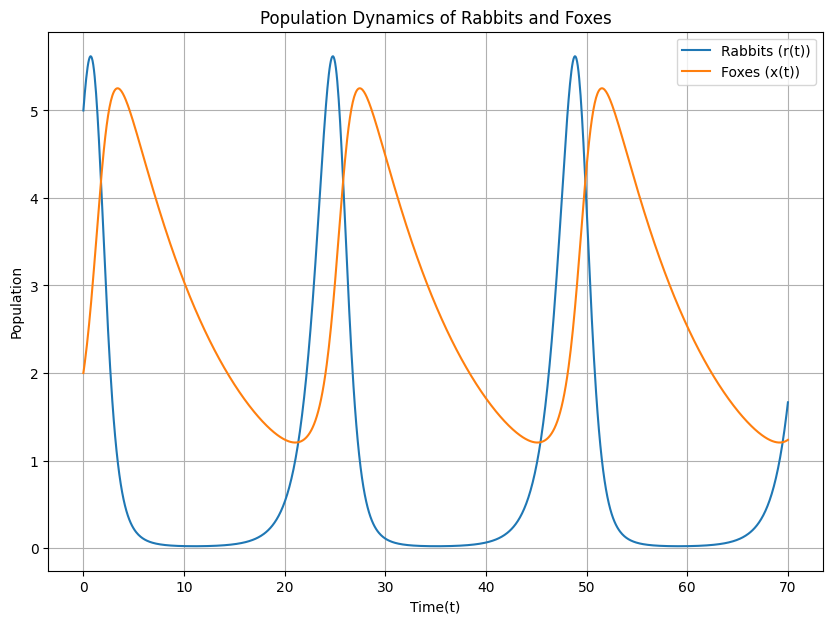

In [25]:
# Ploting the solution
plt.figure(figsize=(10, 7))
plt.plot(t, r, label='Rabbits (r(t))')
plt.plot(t, x, label='Foxes (x(t))')
plt.xlabel('Time(t)')
plt.ylabel('Population')
plt.legend()
plt.title('Population Dynamics of Rabbits and Foxes')
plt.grid(True)
plt.show()

#Task 2: Creating the Phase Portrait

In [26]:
# Number of solutions to plot
num_solutions = 10

In [27]:
# Generate random initial conditions within the range [1, 9]
initial_conditions = np.random.uniform(1, 9, size=(num_solutions, 2))

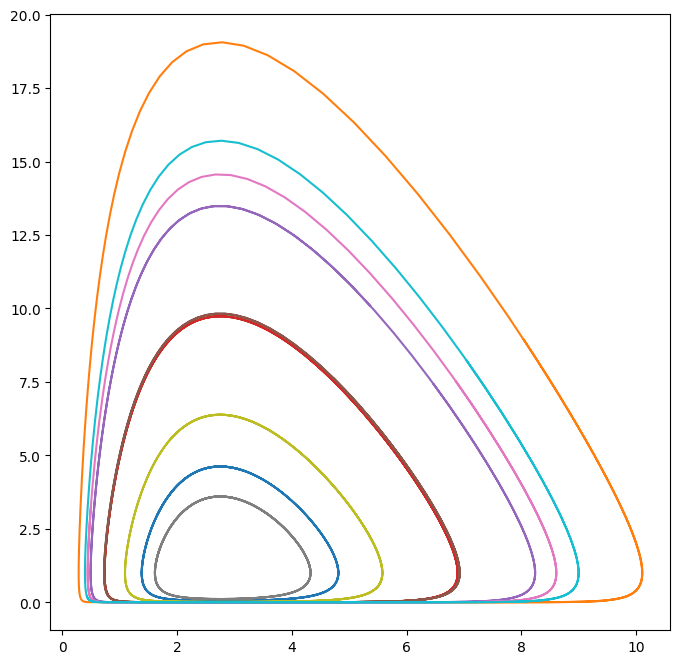

In [28]:
# Plot the phase portrait
plt.figure(figsize=(8, 8))
for r0, x0 in initial_conditions:
    solution = odeint(ode_system, [r0, x0], t, args=(alpha, beta, delta, gamma))
    plt.plot(solution[:, 1], solution[:, 0])

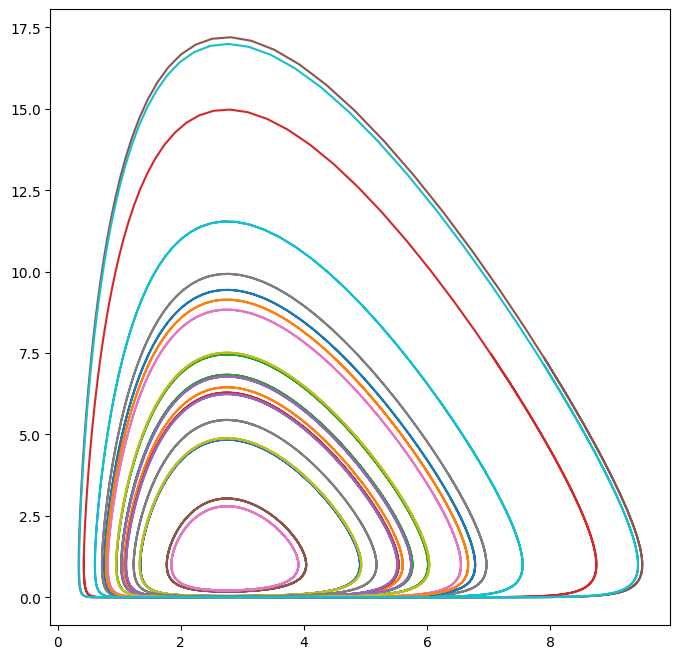

In [29]:
num_solutions = 20
initial_conditions = np.random.uniform(1, 9, size=(num_solutions, 2))
plt.figure(figsize=(8, 8))
for r0, x0 in initial_conditions:
    solution = odeint(ode_system, [r0, x0], t, args=(alpha, beta, delta, gamma))
    plt.plot(solution[:, 1], solution[:, 0])

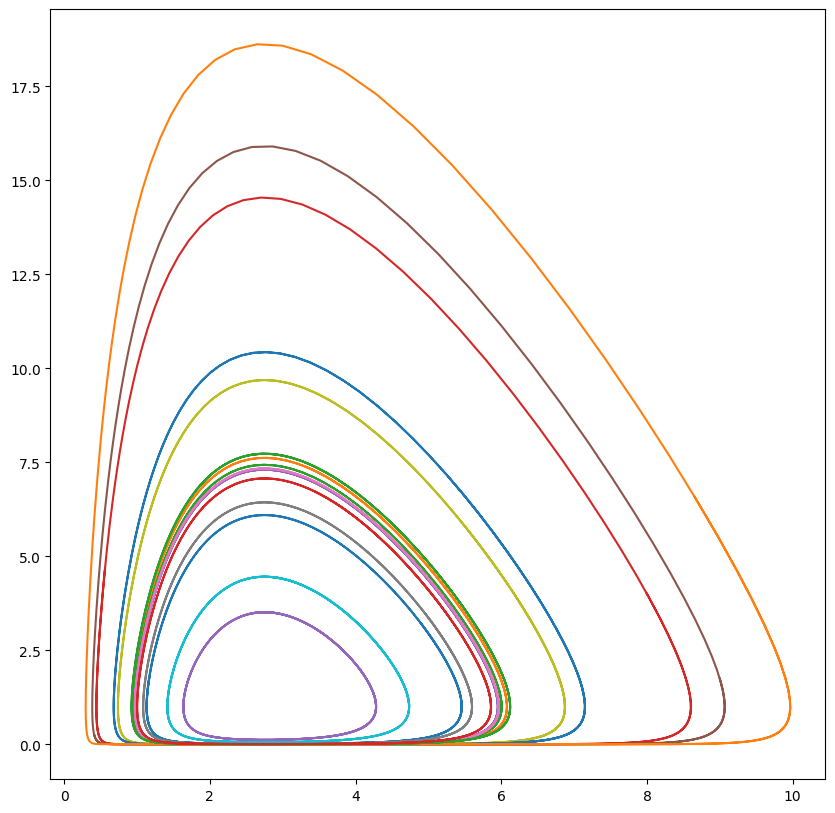

In [30]:
num_solutions = 15
initial_conditions = np.random.uniform(1, 9, size=(num_solutions, 2))
plt.figure(figsize=(10, 10))
for r0, x0 in initial_conditions:
    solution = odeint(ode_system, [r0, x0], t, args=(alpha, beta, delta, gamma))
    plt.plot(solution[:, 1], solution[:, 0])

#Task 3: Finding Equilibria

In [31]:
import sympy as sp

# We have define symbolic variables
r, x = sp.symbols('r x')

# Define the ODEs
drdt = alpha * r - beta * r * x
dxdt = delta * r * x - gamma * x

# Find equilibria by solving dr/dt = 0 and dx/dt = 0
equilibria = sp.solve([drdt, dxdt], (r, x))

print("Equilibria:")
for equilibrium in equilibria:
    print(f"r = {equilibrium[0]}, x = {equilibrium[1]}")


Equilibria:
r = 0.0, x = 0.0
r = 1.00000000000000, x = 2.75000000000000


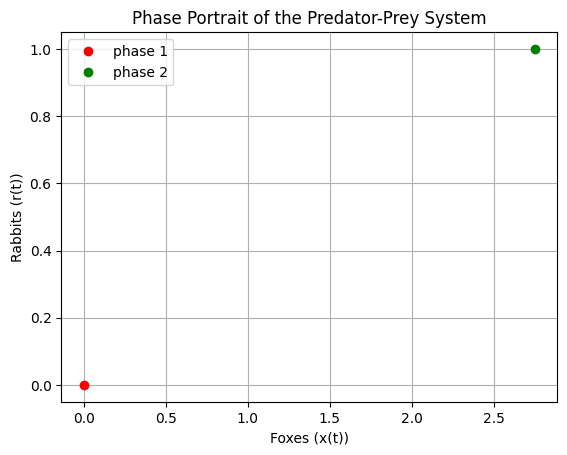

In [32]:
# Plot equilibria (steady states)
phase1 = [0, 0]
phase2 = [gamma / delta, alpha / beta]
plt.plot(phase1[1], phase1[0], 'ro', label='phase 1')
plt.plot(phase2[1], phase2[0], 'go', label='phase 2')

plt.xlabel('Foxes (x(t))')
plt.ylabel('Rabbits (r(t))')
plt.legend()
plt.title('Phase Portrait of the Predator-Prey System')
plt.grid(True)
plt.show()